In [82]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('Vehicle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Vehicle\car data.csv
Vehicle\CAR DETAILS FROM CAR DEKHO.csv
Vehicle\Car details v3.csv
Vehicle\car details v4.csv


In [3]:
df = pd.read_csv(r"C:\Users\chokh\Downloads\Car\Vehicle\Car details v3.csv")

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.shape

(8128, 13)

In [6]:
# missing values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
# duplicate data
df.duplicated().sum()

1202

In [9]:
# describe function
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [10]:
1.000000e+07

10000000.0

In [11]:
# drop any row with missing values
df.dropna(inplace=True)

In [12]:
df.shape

(7906, 13)

In [13]:
# no of dropped rows
8128 - 7906
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [14]:
# remove duplicate rows
df = df.drop_duplicates(keep='first')

In [15]:
df.shape

(6717, 13)

In [16]:
df.duplicated().sum()

0

In [17]:
# change data type of seats col
df['seats'] = df['seats'].astype('int32')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           6717 non-null   object
 1   year           6717 non-null   int64 
 2   selling_price  6717 non-null   int64 
 3   km_driven      6717 non-null   int64 
 4   fuel           6717 non-null   object
 5   seller_type    6717 non-null   object
 6   transmission   6717 non-null   object
 7   owner          6717 non-null   object
 8   mileage        6717 non-null   object
 9   engine         6717 non-null   object
 10  max_power      6717 non-null   object
 11  torque         6717 non-null   object
 12  seats          6717 non-null   int32 
dtypes: int32(1), int64(3), object(9)
memory usage: 708.4+ KB


In [20]:
# Handling mileage col
df['mileage'] = df['mileage'].str.split(expand=True)[0]
df['mileage'] = df['mileage'].astype('float64')

In [21]:
# Handling engine col
df['engine'] = df['engine'].str.split(expand=True)[0]
df['engine'] = df['engine'].astype('int32')

In [22]:
# Handling max_power col
df['max_power'] = df['max_power'].str.split(expand=True)[0]
df['max_power'] = df['max_power'].astype('float64')

In [23]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5


In [24]:
# dropping the torque col
df.drop(columns=['torque'],inplace=True)

In [25]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5


In [26]:
df['name'].unique().shape

(1982,)

In [27]:
# extracting brand from name
df['brand'] = df['name'].str.split(expand=True)[0]

In [28]:
df.drop(columns=['name'],inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti


In [29]:
freq_brands = df['brand'].value_counts()[df['brand'].value_counts()>100].index.tolist()

In [30]:
df = df[df['brand'].isin(freq_brands)]

In [31]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,Hyundai


In [32]:
freq_fuel = ['Diesel','Petrol']
df = df[df['fuel'].isin(freq_fuel)]

In [34]:
df['seller_type'].value_counts()

seller_type
Individual          5607
Dealer               560
Trustmark Dealer      25
Name: count, dtype: int64

In [35]:
df = df[df['seller_type'].isin(['Individual','Dealer'])]

In [36]:
df = df[df['owner'].isin(['First Owner','Second Owner','Third Owner'])]

In [37]:
df.shape

(6015, 12)

<Axes: >

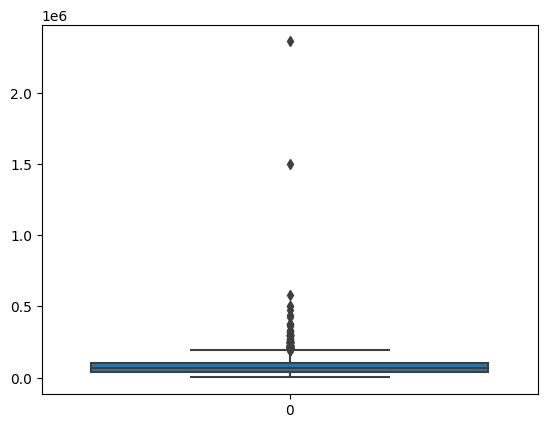

In [39]:
import seaborn as sns
sns.boxplot(df['km_driven'])

In [40]:
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
iqr = q3 - q1

In [41]:
max_val_km_driven = q3 + 1.5*iqr

In [42]:
max_val_km_driven

193000.0

In [43]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,Hyundai


In [44]:
df['km_driven'] = np.where(df['km_driven']>max_val_km_driven,max_val_km_driven,df['km_driven'])

<Axes: >

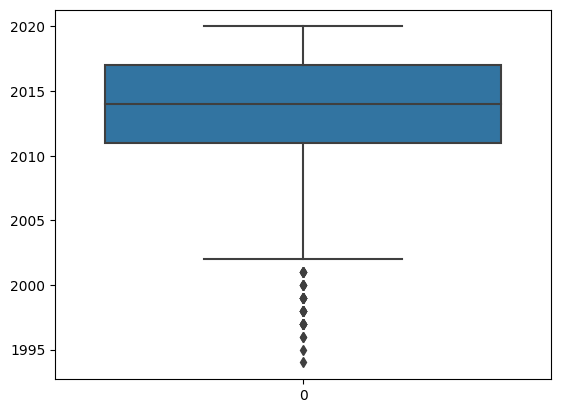

In [45]:
sns.boxplot(df['year'])

In [46]:
df = df[df['year'] >= 2000]

<Axes: >

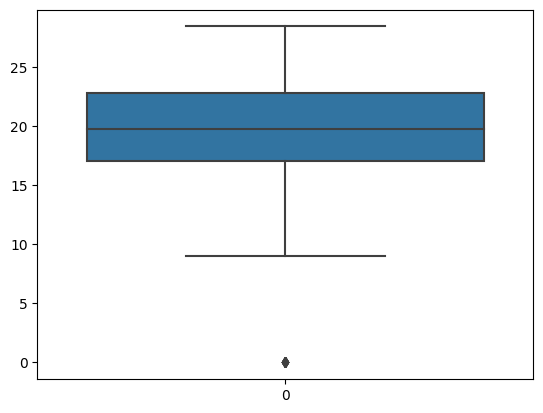

In [47]:
sns.boxplot(df['mileage'])

In [48]:
mean_mileage = df[df['mileage'] !=0]['mileage'].median()
mean_mileage

19.7

In [49]:
df['mileage'] = np.where(df['mileage'] == 0,mean_mileage,df['mileage'])

In [50]:
df.shape

(5988, 12)

In [51]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
2,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti
5,2017,440000,45000.0,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,Hyundai


In [63]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
# Ordinal encoding on Owner col
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [65]:
tnf = ColumnTransformer(
    [
        ('ordinal',OrdinalEncoder(),['owner']),
        ('nominal',OneHotEncoder(drop='first',sparse=False),['fuel','seller_type','transmission','brand'])
    ], remainder='passthrough'
)

In [66]:
X_train_tnf = tnf.fit_transform(X_train)
X_test_tnf = tnf.transform(X_test)

C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr = LinearRegression()

In [69]:
lr.fit(X_train_tnf,y_train)

LinearRegression()

In [70]:
y_pred = lr.predict(X_test_tnf)

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7862128037767564

In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [73]:
X_train_poly = poly.fit_transform(X_train_tnf)
X_test_poly = poly.transform(X_test_tnf)

In [76]:
lr = LinearRegression()
#lr.fit(X_train_poly,y_train)
#y_pred = lr.predict(X_test_poly)
#r2_score(y_test,y_pred)

In [77]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(
    [
        ('col-transformer',tnf),
        ('poly',poly),
        ('lr',lr)
    ]
)

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8710904961659396

In [78]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [79]:
X_train['brand'].value_counts()

brand
Maruti        1537
Hyundai        920
Mahindra       563
Tata           500
Ford           284
Honda          278
Toyota         235
Renault        167
Chevrolet      167
Volkswagen     139
Name: count, dtype: int64

In [80]:
y_train

4996    200000
2063    351000
5788    200000
593     300000
5191    300000
         ...  
1417    395000
3212    950000
4808    750000
7680    550000
3290    370000
Name: selling_price, Length: 4790, dtype: int64

In [81]:
X_train

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
4996,2010,120000.0,Petrol,Individual,Manual,First Owner,15.70,1390,75.00,5,Mahindra
2063,2016,60000.0,Petrol,Individual,Manual,First Owner,23.10,998,67.04,5,Maruti
5788,2011,91000.0,Petrol,Individual,Manual,Second Owner,20.36,1197,78.90,5,Hyundai
593,2016,66693.0,Petrol,Dealer,Manual,First Owner,25.17,799,53.30,5,Renault
5191,2015,110000.0,Petrol,Individual,Manual,First Owner,20.51,998,67.04,5,Maruti
...,...,...,...,...,...,...,...,...,...,...,...
1417,2012,120000.0,Diesel,Individual,Manual,First Owner,22.32,1582,126.32,5,Hyundai
3212,2016,80000.0,Diesel,Individual,Manual,First Owner,12.99,2494,100.60,7,Toyota
4808,2018,30000.0,Diesel,Individual,Manual,First Owner,22.54,1396,88.76,5,Hyundai
7680,2013,120000.0,Diesel,Individual,Manual,Third Owner,20.77,1248,88.76,7,Maruti
